In [113]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import calendar

In [ ]:
data = pd.read_excel("../datasets/Dataset.xlsx", sheet_name=['Weather', 'Total Consumers'])
df_tc = data['Total Consumers']
df_w = data['Weather']
df_tc

In [ ]:
our_data = pd.read_csv("data/shared_1year.csv")
our_data

In [ ]:
our_total = pd.DataFrame(our_data.sum(axis=1))
our_total.columns = ['Energy']
our_total

In [ ]:
df_w

In [ ]:
df_merge = pd.concat([df_w,df_tc[0].rename("Energy")], axis=1)
df_merged = df_merge.dropna(axis=0).reset_index(drop=True)
df_merged['datetime'] = pd.to_datetime(df_merged['datetime']) 
df_merged

In [ ]:
df_total = pd.DataFrame(df_tc.sum(axis=1))
df_total.columns = ['Energy']
df_total = df_total[:df_merged.shape[0]]
df_total

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(df_merged["datetime"], df_merged["Energy"], color='purple')
plt.ylabel('Energy consumed in the Public Building (kWh)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Energy Consumption for a Particular Time Frame', fontsize=14)
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(df_merged["datetime"], df_total, color='purple')
plt.ylabel('Energy consumed (kWh)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Energy Consumption for a Particular Time Frame', fontsize=14)
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(pd.to_datetime(our_data['Time']), our_total, color='purple')
plt.ylabel('Total Energy consumed in our Dataset (kWh)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Energy Consumption for a Particular Time Frame', fontsize=14)
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(pd.to_datetime(our_data['Time']), our_data['PT87ZW'], color='purple')
plt.ylabel('Energy consumed in one house of our Dataset (kWh)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Energy Consumption for a Particular Time Frame', fontsize=14)
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
autocorrelation_plot(df_total)

In [ ]:
autocorrelation_plot(df_tc[0])

In [ ]:
autocorrelation_plot(our_total)

## Visualize by day of week

### Shared Dataset

In [131]:
df_shared = pd.read_csv("data/shared_organized.csv", index_col=[0])
df_shared.reset_index(drop=True, inplace=True)
df_shared = df_shared.iloc[:, [0, 2, 1]]
df_shared

,Time,Location,Energy
0,2021-11-01 00:15:00,PT41CV,0.028
1,2021-11-01 00:30:00,PT41CV,0.080
2,2021-11-01 00:45:00,PT41CV,0.092
3,2021-11-01 01:00:00,PT41CV,0.040
4,2021-11-01 01:15:00,PT41CV,0.076
...,...,...,...
245219,2022-10-31 23:00:00,PT87ZW,0.368
245220,2022-10-31 23:15:00,PT87ZW,0.396
245221,2022-10-31 23:30:00,PT87ZW,0.356
245222,2022-10-31 23:45:00,PT87ZW,0.392


In [132]:
df_shared.isna().any()

Time        False
Location    False
Energy      False
dtype: bool

In [133]:
df_shared['Time'] = pd.to_datetime(df_shared['Time'])
df_shared['DayOfWeek'] = df_shared['Time'].dt.dayofweek
df_shared['Weekend'] = df_shared['Time'].dt.dayofweek.isin([5, 6]).astype(int)
df_shared['Hour'] = df_shared['Time'].dt.hour
df_shared['Month'] = df_shared['Time'].dt.month
df_shared

,Time,Location,Energy,DayOfWeek,Weekend,Hour,Month
0,2021-11-01 00:15:00,PT41CV,0.028,0,0,0,11
1,2021-11-01 00:30:00,PT41CV,0.080,0,0,0,11
2,2021-11-01 00:45:00,PT41CV,0.092,0,0,0,11
3,2021-11-01 01:00:00,PT41CV,0.040,0,0,1,11
4,2021-11-01 01:15:00,PT41CV,0.076,0,0,1,11
...,...,...,...,...,...,...,...
245219,2022-10-31 23:00:00,PT87ZW,0.368,0,0,23,10
245220,2022-10-31 23:15:00,PT87ZW,0.396,0,0,23,10
245221,2022-10-31 23:30:00,PT87ZW,0.356,0,0,23,10
245222,2022-10-31 23:45:00,PT87ZW,0.392,0,0,23,10


In [134]:
df_weekly = df_shared.groupby(['DayOfWeek']).mean()
df_weekly.drop(['Hour', 'Weekend', 'Month'], inplace=True, axis=1)
df_weekly

,Energy
DayOfWeek,
0,0.283380
1,0.292017
2,0.287956
3,0.289358
4,0.285962
5,0.292186
6,0.297752


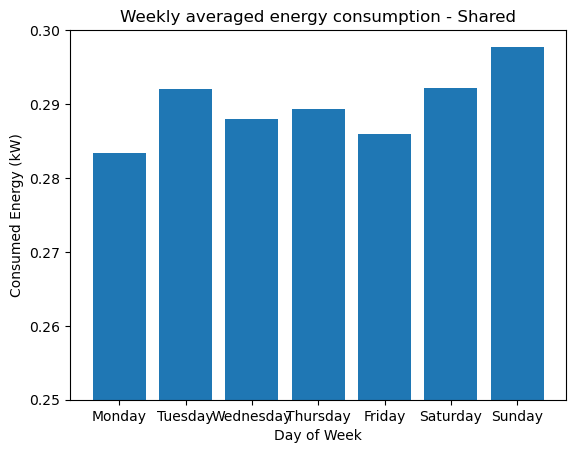

In [157]:
plt.bar(list(calendar.day_name), df_weekly['Energy'])
plt.xlabel("Day of Week")
plt.ylabel("Consumed Energy (kW)")
plt.title("Weekly averaged energy consumption - Shared")
plt.ylim(0.25,0.30)
plt.savefig("images/weekly_consumption_shared.png")
plt.show()

In [135]:
df_hourly = df_shared.groupby(['Hour']).mean()
df_hourly.drop(['DayOfWeek', 'Weekend', 'Month'], inplace=True, axis=1)
df_hourly

,Energy
Hour,
0,0.270542
1,0.237176
2,0.216157
3,0.199174
4,0.200223
5,0.171507
6,0.155240
7,0.175699
8,0.224137


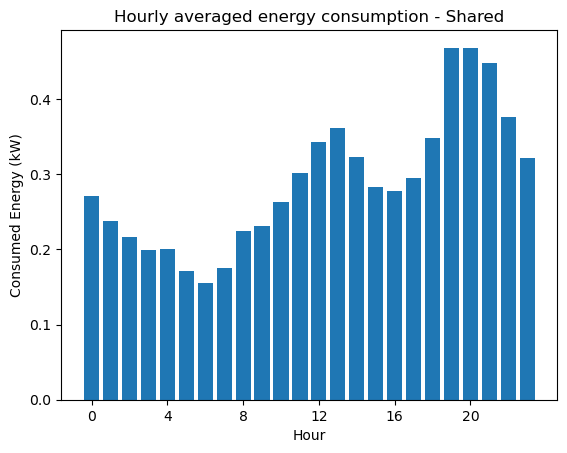

In [150]:
plt.bar(range(len(df_hourly)), df_hourly['Energy'])
plt.xlabel("Hour")
plt.ylabel("Consumed Energy (kW)")
plt.title("Hourly averaged energy consumption - Shared")
plt.xticks(list([0,4,8,12,16,20]))
plt.savefig("images/hourly_consumption_shared.png")
plt.show()

In [137]:
df_monthly = df_shared.groupby(['Month']).sum()
df_monthly.drop(['DayOfWeek', 'Weekend', 'Hour'], inplace=True, axis=1)
df_monthly

,Energy
Month,
1,7416.436
2,5553.924
3,5627.572
4,5084.068
5,4966.008
6,4957.944
7,5438.628
8,5562.508
9,5857.788


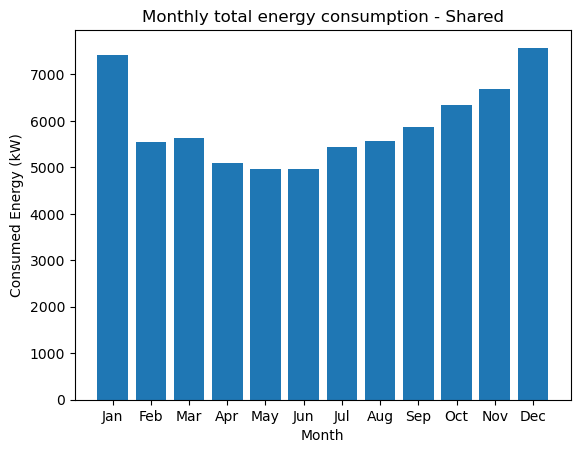

In [148]:
plt.bar(list(calendar.month_abbr[1:]), df_monthly['Energy'])
plt.xlabel("Month")
plt.ylabel("Consumed Energy (kW)")
plt.title("Monthly total energy consumption - Shared")
#plt.grid(True)
plt.savefig("images/monthly_consumption_shared.png")
plt.show()

### Porto Dataset

In [158]:
df_porto = pd.read_csv("data/porto.csv", index_col=[0], decimal=',')
df_porto.reset_index(drop=True, inplace=True)
df_porto = df_porto.iloc[:, [0, 2, 1]]
df_porto

,Time,Location,Energy
0,2019-01-01 00:00:00,0,2.964000
1,2019-01-01 00:15:00,0,2.584000
2,2019-01-01 00:30:00,0,3.071000
3,2019-01-01 00:45:00,0,2.694000
4,2019-01-01 01:00:00,0,2.569000
...,...,...,...
1791931,2020-01-01 22:45:00,50,0.753222
1791932,2020-01-01 23:00:00,50,0.716855
1791933,2020-01-01 23:15:00,50,0.735802
1791934,2020-01-01 23:30:00,50,0.485237


In [159]:
df_porto.isna().sum()

Time        0
Location    0
Energy      0
dtype: int64

In [160]:
df_porto['Time'] = pd.to_datetime(df_porto['Time'])
df_porto['DayOfWeek'] = df_porto['Time'].dt.dayofweek
df_porto['Weekend'] = df_porto['Time'].dt.dayofweek.isin([5, 6]).astype(int)
df_porto['Hour'] = df_porto['Time'].dt.hour
df_porto['Month'] = df_porto['Time'].dt.month
df_porto

,Time,Location,Energy,DayOfWeek,Weekend,Hour,Month
0,2019-01-01 00:00:00,0,2.964000,1,0,0,1
1,2019-01-01 00:15:00,0,2.584000,1,0,0,1
2,2019-01-01 00:30:00,0,3.071000,1,0,0,1
3,2019-01-01 00:45:00,0,2.694000,1,0,0,1
4,2019-01-01 01:00:00,0,2.569000,1,0,1,1
...,...,...,...,...,...,...,...
1791931,2020-01-01 22:45:00,50,0.753222,2,0,22,1
1791932,2020-01-01 23:00:00,50,0.716855,2,0,23,1
1791933,2020-01-01 23:15:00,50,0.735802,2,0,23,1
1791934,2020-01-01 23:30:00,50,0.485237,2,0,23,1


In [161]:
df_weekly_porto = df_porto.groupby(['DayOfWeek']).mean()
df_weekly_porto.drop(['Location', 'Hour', 'Weekend', 'Month'], inplace=True, axis=1)
df_weekly_porto

,Energy
DayOfWeek,
0,0.764698
1,0.736422
2,0.775358
3,0.760662
4,0.788554
5,0.738582
6,0.779934


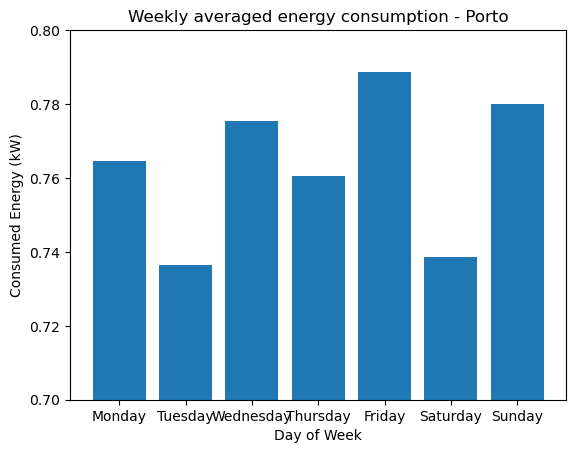

In [172]:
plt.bar(list(calendar.day_name), df_weekly_porto['Energy'])
plt.xlabel("Day of Week")
plt.ylabel("Consumed Energy (kW)")
plt.title("Weekly averaged energy consumption - Porto")
plt.ylim(0.7,0.8)
plt.savefig("images/weekly_consumption_porto.png")
plt.show()

In [164]:
df_hourly_porto = df_porto.groupby(['Hour']).mean()
df_hourly_porto.drop(['Location', 'DayOfWeek', 'Weekend', 'Month'], inplace=True, axis=1)
df_hourly_porto

,Energy
Hour,
0,0.716717
1,0.663583
2,0.643213
3,0.635617
4,0.603679
5,0.542506
6,0.566129
7,0.654651
8,0.767562


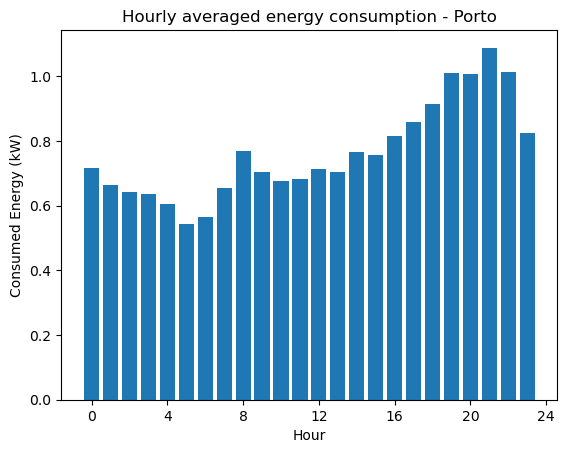

In [165]:
plt.bar(range(len(df_hourly_porto)), df_hourly_porto['Energy'])
plt.xlabel("Hour")
plt.ylabel("Consumed Energy (kW)")
plt.title("Hourly averaged energy consumption - Porto")
plt.xticks(list([0,4,8,12,16,20,24]))
plt.savefig("images/hourly_consumption_porto.png")
plt.show()

In [167]:
df_monthly_porto = df_porto.groupby(['Month']).sum()
df_monthly_porto.drop(['Location','DayOfWeek', 'Weekend', 'Hour'], inplace=True, axis=1)
df_monthly_porto

,Energy
Month,
1,149464.988154
2,119607.056088
3,126842.465440
4,103826.394743
5,103761.874211
6,91686.346490
7,86488.008611
8,79870.297619
9,104485.154526


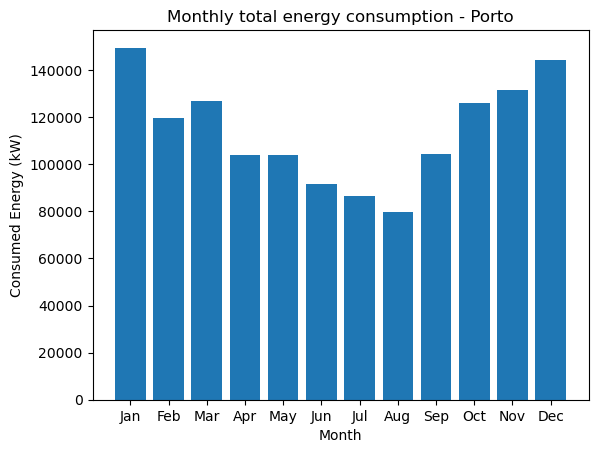

In [168]:
plt.bar(list(calendar.month_abbr[1:]), df_monthly_porto['Energy'])
plt.xlabel("Month")
plt.ylabel("Consumed Energy (kW)")
plt.title("Monthly total energy consumption - Porto")
#plt.grid(True)
plt.savefig("images/monthly_consumption_porto.png")
plt.show()